In [3]:
import CMGDB
import matplotlib.pyplot as plt
import numpy as np

### Periodic example

In [210]:
# Define the torus map
# f(x, y) = (2 x + 3 y, 0.5 x + 0.3 y) mod 1
def f(x):
    x[0] = (x[0] - 1) ** 3 + 1

    x[1] = np.cbrt((x[1] - 1)) + 1
    
    
    return [x[0], x[1]]

# Define box map for f
def F(rect):
    return CMGDB.BoxMap(f, rect, padding=True)

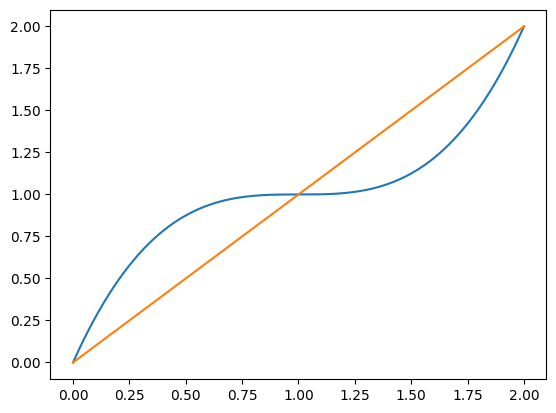

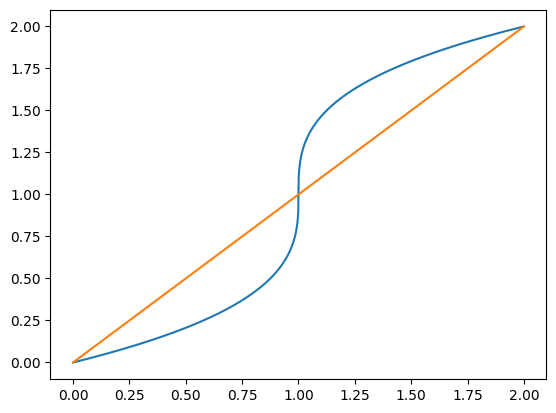

In [211]:
# create 1000 equally spaced points between -10 and 10
t = np.linspace(0, 2, 1000)

fig, ax = plt.subplots()
ax.plot(t, f([t,t])[0])
ax.plot(t, t)

fig, ax = plt.subplots()
ax.plot(t, f([t,t])[1])
ax.plot(t, t)


In [212]:
subdiv_min = 10
subdiv_max = 20
lower_bounds = [0.0, 0.0]
upper_bounds = [2.0, 2.0]
phase_periodic = [True, True]

model = CMGDB.Model(subdiv_min, subdiv_max, lower_bounds, upper_bounds, phase_periodic, F)

In [213]:
%%time
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

Compute_Morse_Graph. Initializing root MorseDecomposition
Compute_Morse_Graph. A phase_space -> size () == 1
CPU times: user 116 ms, sys: 5.15 ms, total: 121 ms
Wall time: 126 ms
Compute_Morse_Graph. B phase_space -> size () == 364
Total Grid Memory (can be external) = 796902
Max Memory For Single Grid (must be internal)= 78046
Max SCC Random Access memory use (must be internal)= 8704
Max SCC stack memory use (can be external memory) = 776
 ---- SUMMARY ---- 
Internal Memory Requirement = 86750
External Memory Requirement = 797678
Max graph memory size (never stored, however) = 30688


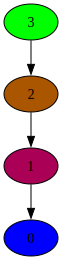

In [214]:
CMGDB.PlotMorseGraph(morse_graph)

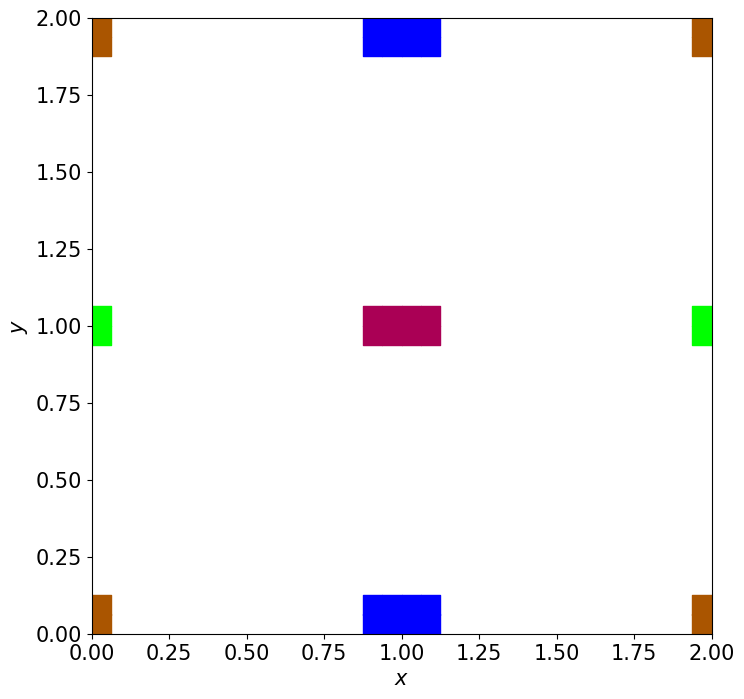

In [215]:
CMGDB.PlotMorseSets(morse_graph) #, xlim=[0.9, 1.1], ylim=[0.9, 1.1])

In [56]:
import CMGDB
import dytop.Grid as Grid
import dytop.CMGDB_util as CMGDB_util

import numpy as np
import matplotlib.pyplot as plt

In [263]:
sb = subdiv_init = subdiv_min = 6  # for uniform grid
subdiv_max = 20
subdiv_limit = 10000

In [224]:
#sampling 
MG_util = CMGDB_util.CMGDB_util()

num_pts = 2 ** (sb + 10)

data = MG_util.sample_points(lower_bounds, upper_bounds, num_pts)

In [225]:
data.shape

(65536, 2)

In [226]:
data

array([[0.35161295, 1.86110244],
       [1.26724429, 1.66603921],
       [1.9901676 , 1.68467647],
       ...,
       [0.48870645, 0.56502765],
       [1.96463077, 1.44369313],
       [0.73929001, 1.32818221]])

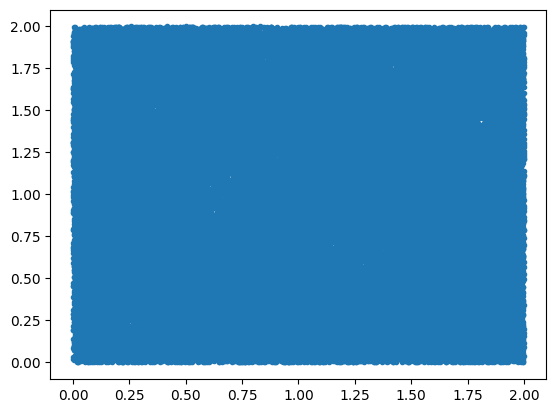

In [227]:
plt.scatter(data[:,0], data[:,1], marker='.')
plt.show()

In [228]:
def f(x):
    print(x.shape)
    return np.concatenate(
        (((x[:,0] - 1) ** 3 + 1).reshape(-1,1), (np.cbrt((x[:,1] - 1)) + 1).reshape(-1,1))
    , axis=1)

In [229]:
((data[:,0] - 1) ** 3 + 1)


array([0.72741435, 1.01908646, 1.97079188, ..., 0.86633708, 1.89760101,
       0.98227962])

In [230]:
(np.cbrt((data[:,1] - 1)) + 1)

array([1.95137472, 1.87330631, 1.88137718, ..., 0.24231757, 1.76271256,
       1.68977113])

In [231]:
data_y = f(data)

(65536, 2)


In [232]:
data_y

array([[0.72741435, 1.95137472],
       [1.01908646, 1.87330631],
       [1.97079188, 1.88137718],
       ...,
       [0.86633708, 0.24231757],
       [1.89760101, 1.76271256],
       [0.98227962, 1.68977113]])

In [233]:
data.shape

(65536, 2)

In [234]:
data = np.concatenate((data,data_y),axis=1)
# data.shape

In [235]:
data

array([[0.35161295, 1.86110244, 0.72741435, 1.95137472],
       [1.26724429, 1.66603921, 1.01908646, 1.87330631],
       [1.9901676 , 1.68467647, 1.97079188, 1.88137718],
       ...,
       [0.48870645, 0.56502765, 0.86633708, 0.24231757],
       [1.96463077, 1.44369313, 1.89760101, 1.76271256],
       [0.73929001, 1.32818221, 0.98227962, 1.68977113]])

In [236]:
subdivision = sb
grid = Grid.Grid(lower_bounds, upper_bounds, sb)

id2image = grid.id2image(data)

In [253]:
# Define box map for f
K=[0.5,0.5]
def F(rect):
    return MG_util.F_data(rect, id2image, grid.point2cell, K)

In [254]:
F([0, 0, 0.5, 0.5])

[0.3286766914668662,
 -0.15855644316795814,
 1.1247503296853063,
 0.4562701402558941]

In [264]:
model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit,
                    lower_bounds, upper_bounds, F)

In [265]:
%%time
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

Compute_Morse_Graph. Initializing root MorseDecomposition
Compute_Morse_Graph. A phase_space -> size () == 64
CPU times: user 3min 52s, sys: 2.93 s, total: 3min 55sCompute_Morse_Graph. B phase_space -> size () == 128

Wall time: 4min 2s
Total Grid Memory (can be external) = 13894704
Max Memory For Single Grid (must be internal)= 584650
Max SCC Random Access memory use (must be internal)= 65280
Max SCC stack memory use (can be external memory) = 245680
 ---- SUMMARY ---- 
Internal Memory Requirement = 649930
External Memory Requirement = 14140384
Max graph memory size (never stored, however) = 471920640


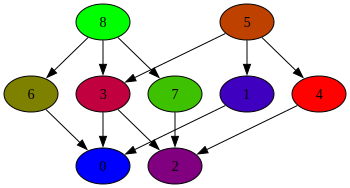

In [266]:
CMGDB.PlotMorseGraph(morse_graph)

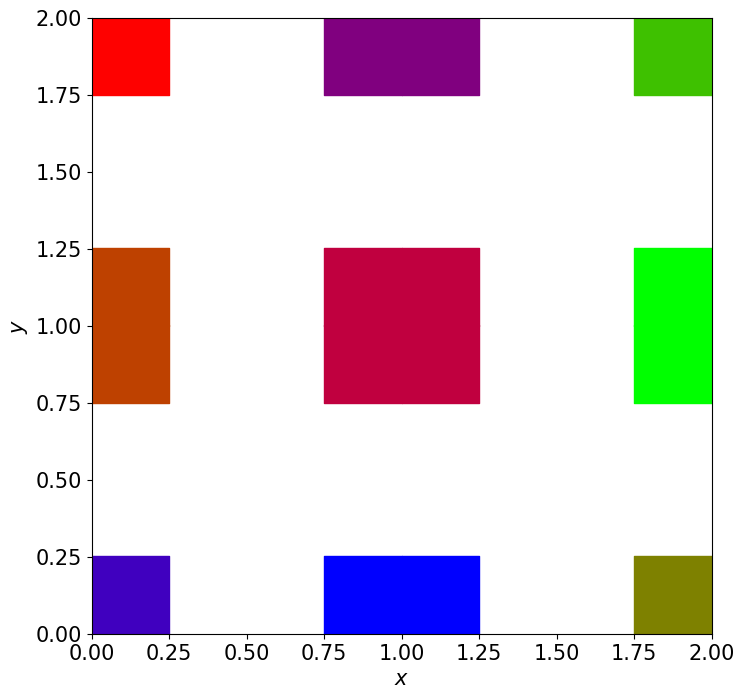

In [267]:
CMGDB.PlotMorseSets(morse_graph)

In [268]:
model = CMGDB.Model(subdiv_min, subdiv_max, lower_bounds, upper_bounds, phase_periodic, F)

In [269]:
%%time
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

Compute_Morse_Graph. Initializing root MorseDecomposition
Compute_Morse_Graph. A phase_space -> size () == 1
CPU times: user 3min 5s, sys: 2.43 s, total: 3min 7sCompute_Morse_Graph. B phase_space -> size () == 120

Wall time: 3min 14s
Total Grid Memory (can be external) = 20725270
Max Memory For Single Grid (must be internal)= 584650
Max SCC Random Access memory use (must be internal)= 65280
Max SCC stack memory use (can be external memory) = 245680
 ---- SUMMARY ---- 
Internal Memory Requirement = 649930
External Memory Requirement = 20970950
Max graph memory size (never stored, however) = 471920640


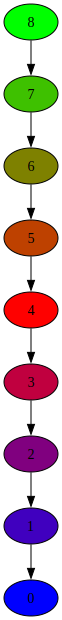

In [270]:
CMGDB.PlotMorseGraph(morse_graph)

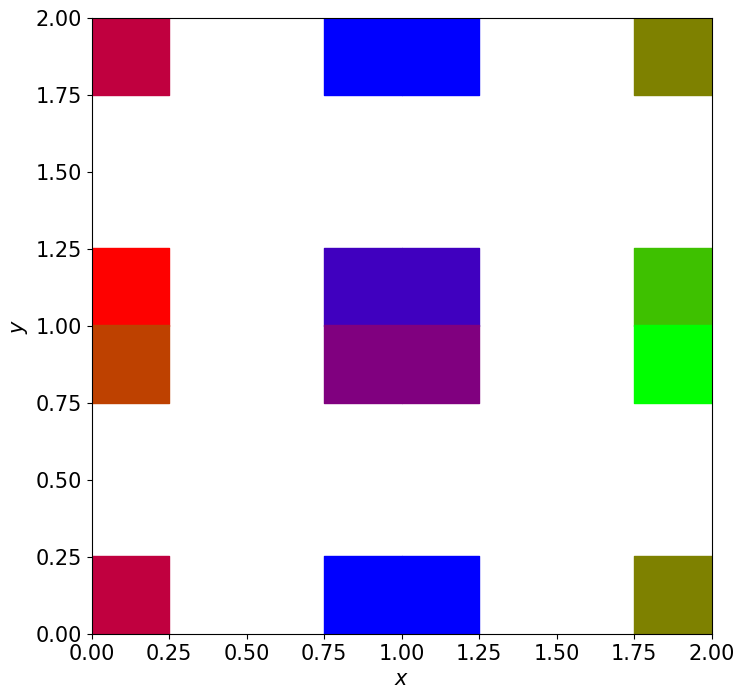

In [271]:
CMGDB.PlotMorseSets(morse_graph)